Top 25 Emitting Categories:
                                     Commodity Name  count     mean       std  \
60                                        Utilities      4  0.67075  1.331506   
59                             Truck transportation      4  0.31600  0.616070   
47                          Pipeline transportation      4  0.28750  0.548444   
2                                Air transportation      4  0.22700  0.450668   
36                     Nonmetallic mineral products      4  0.18700  0.370004   
30                       Mining, except oil and gas      4  0.18600  0.356105   
49                                   Primary metals      4  0.17475  0.334267   
63                             Water transportation      4  0.17000  0.299897   
52                              Rail transportation      4  0.16525  0.326504   
46                      Petroleum and coal products      4  0.16250  0.313067   
15                                            Farms      4  0.15600  0.289546   


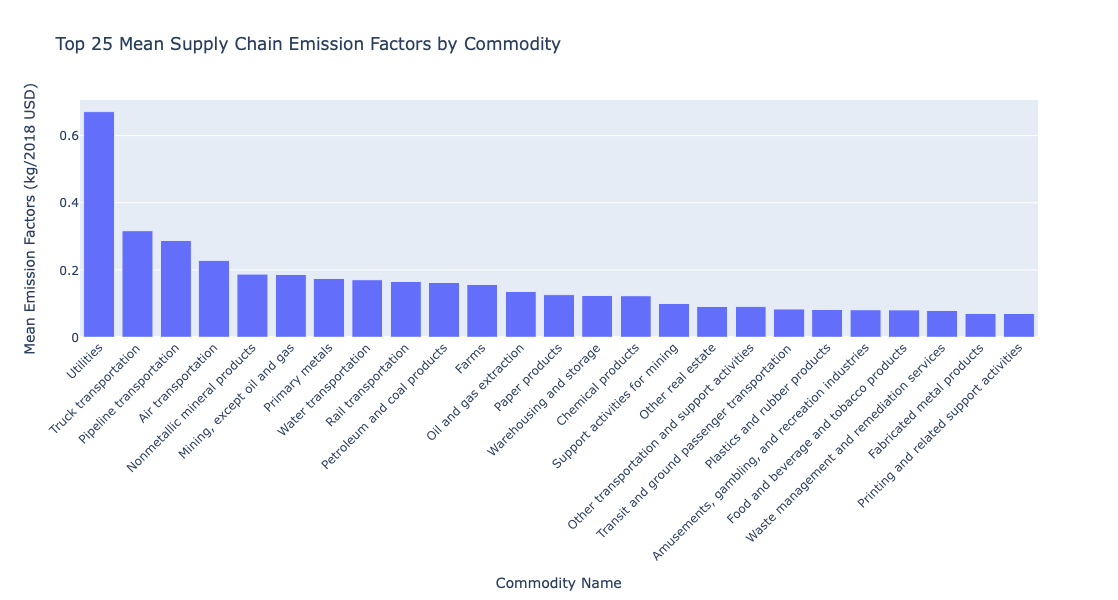

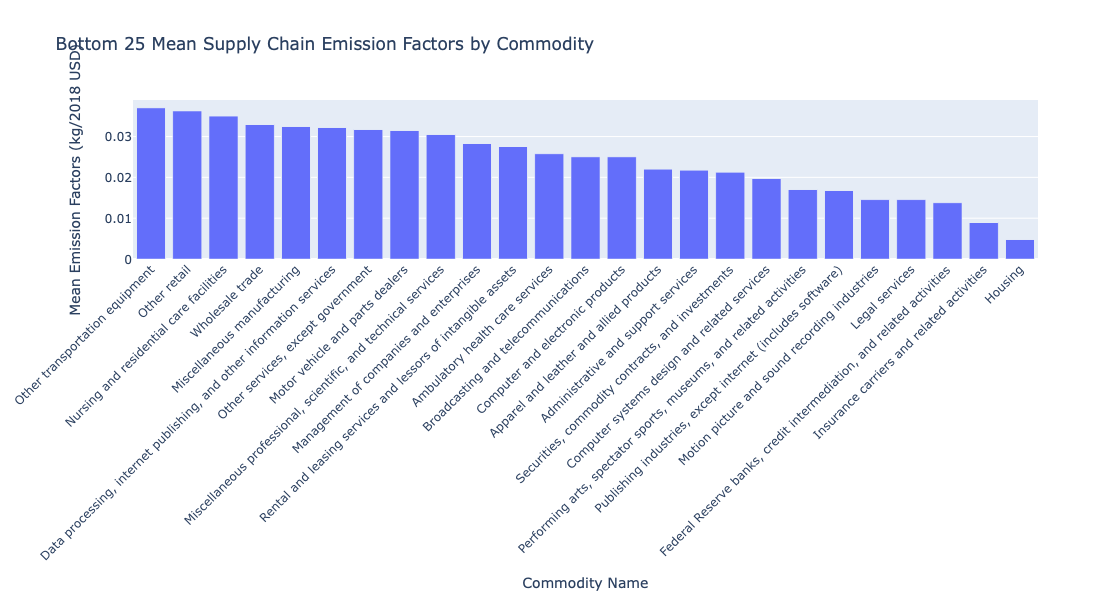

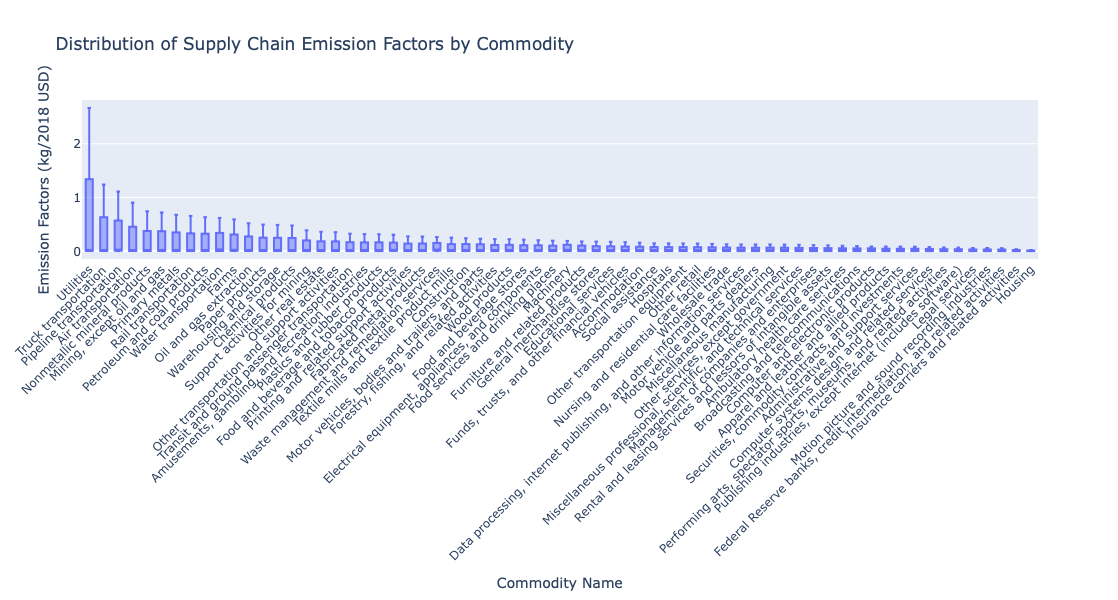

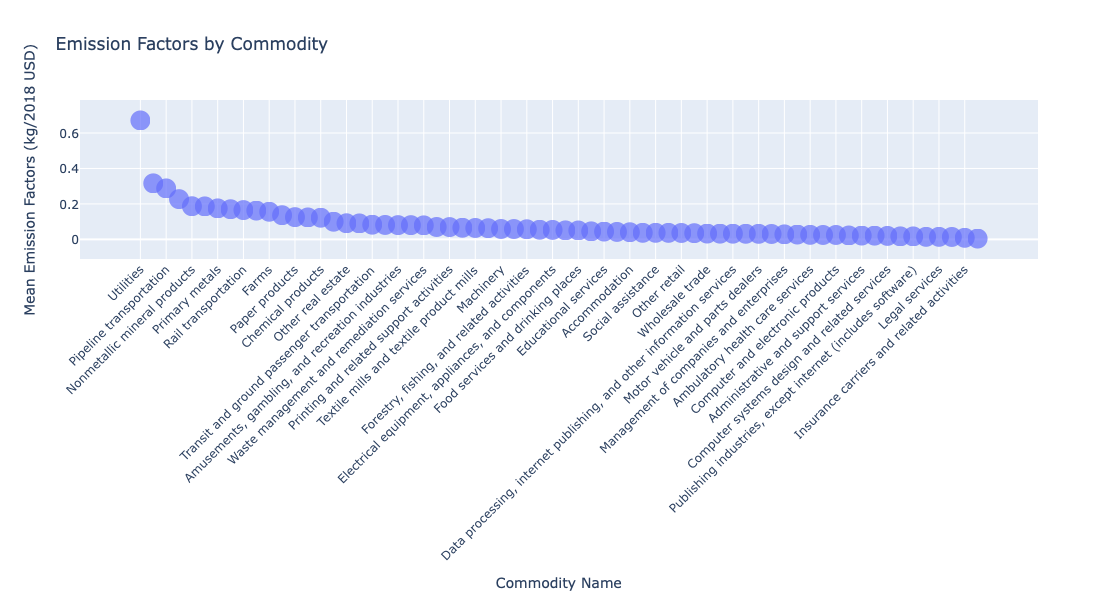

In [8]:
import pandas as pd
import plotly.express as px

#https://catalog.data.gov/dataset/supply-chain-ghg-emission-factors-for-us-commodities-and-industries-v1-1-1

# Load the Excel file
file_path = 'SupplyChainEmissionFactorsforUSIndustriesCommodities v1.1.xlsx'

# Load the specified sheet with the correct name
sheet_name_correct = '2016_Summary_Commodity'
df_correct = pd.read_excel(file_path, sheet_name=sheet_name_correct)

# Extract relevant columns
df_emissions = df_correct[['Commodity Name', 'Supply Chain Emission Factors with Margins']]

# Group by 'Commodity Name' and calculate summary statistics
category_summary = df_emissions.groupby('Commodity Name').agg(
    count=('Supply Chain Emission Factors with Margins', 'count'),
    mean=('Supply Chain Emission Factors with Margins', 'mean'),
    std=('Supply Chain Emission Factors with Margins', 'std'),
    min=('Supply Chain Emission Factors with Margins', 'min'),
    median=('Supply Chain Emission Factors with Margins', 'median'),
    max=('Supply Chain Emission Factors with Margins', 'max')
).reset_index()

# Sort the category summary by mean emission factors in descending order
category_summary_sorted = category_summary.sort_values(by='mean', ascending=False)

# Select the top 25 rows
top_25 = category_summary_sorted.head(25)

# Select the bottom 25 rows
bottom_25 = category_summary_sorted.tail(25)

# Display the category summary sorted
print("Top 25 Emitting Categories:")
print(top_25)
print("\nBottom 25 Emitting Categories:")
print(bottom_25)

# Create an interactive bar chart for mean emission factors by category
fig_mean_top = px.bar(top_25, 
                      x='Commodity Name', 
                      y='mean',
                      title='Top 25 Mean Supply Chain Emission Factors by Commodity',
                      labels={'mean': 'Mean Emission Factors (kg/2018 USD)'},
                      hover_data=['count', 'std', 'min', 'median', 'max'])

# Update layout for better readability
fig_mean_top.update_layout(xaxis_title='Commodity Name',
                           yaxis_title='Mean Emission Factors (kg/2018 USD)',
                           xaxis_tickangle=-45,
                           height=600,
                           width=1000)

# Display the plot
fig_mean_top.show()

# Create an interactive bar chart for the bottom 25 mean emission factors by category
fig_mean_bottom = px.bar(bottom_25, 
                         x='Commodity Name', 
                         y='mean',
                         title='Bottom 25 Mean Supply Chain Emission Factors by Commodity',
                         labels={'mean': 'Mean Emission Factors (kg/2018 USD)'},
                         hover_data=['count', 'std', 'min', 'median', 'max'])

# Update layout for better readability
fig_mean_bottom.update_layout(xaxis_title='Commodity Name',
                              yaxis_title='Mean Emission Factors (kg/2018 USD)',
                              xaxis_tickangle=-45,
                              height=600,
                              width=1000)

# Display the plot
fig_mean_bottom.show()

# Sort the original emissions data for box plot
df_emissions_sorted = df_emissions.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False)

# Create an interactive box plot for emission factors by category
fig_box = px.box(df_emissions_sorted, 
                 x='Commodity Name', 
                 y='Supply Chain Emission Factors with Margins',
                 title='Distribution of Supply Chain Emission Factors by Commodity',
                 labels={'Supply Chain Emission Factors with Margins': 'Emission Factors (kg/2018 USD)'})

# Update layout for better readability
fig_box.update_layout(xaxis_title='Commodity Name',
                      yaxis_title='Emission Factors (kg/2018 USD)',
                      xaxis_tickangle=-45,
                      height=600,
                      width=1000)

# Display the plot
fig_box.show()

# Create a table of emissions by category
fig_table = px.scatter(category_summary_sorted, 
                       x='Commodity Name', 
                       y='mean',
                       title='Emission Factors by Commodity',
                       labels={'mean': 'Mean Emission Factors (kg/2018 USD)'},
                       hover_data=['count', 'std', 'min', 'median', 'max'])

fig_table.update_traces(marker=dict(size=20, opacity=0.7))
fig_table.update_layout(xaxis_title='Commodity Name',
                        yaxis_title='Mean Emission Factors (kg/2018 USD)',
                        xaxis_tickangle=-45,
                        height=600,
                        width=1000)

# Display the table plot
fig_table.show()
